In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install librosa

In [ ]:
import librosa
from librosa import display

In [ ]:
% pylab inline
import os
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import math

labels_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv')
iemocap_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/'

In [ ]:
local_emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from IPython.display import display

%matplotlib inline

In [ ]:
#df_audio_basic = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')

In [ ]:
#df_audio_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_mfcc_chroma_mel.csv')

In [ ]:
#df_audio_complete = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_complete.csv')

In [ ]:
#df_text_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_train.csv')
#df_text_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_test.csv')
#df_text = pd.merge(df_text_train, df_text_test, on=['wav_file','label'])

In [ ]:
#audiocode2text = pickle.load(open('/content/drive/My Drive/IEMOCAP/pre-processed/audiocode2text.pkl', 'rb'))

In [ ]:
import unicodedata

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [ ]:
#df_text_complete = pd.DataFrame()
#df_text_complete['wav_file'] = df_audio_complete['wav_file']
#df_text_complete['label'] = df_audio_complete['label']
#df_text_complete['transcription'] = [normalizeString(audiocode2text[code]) for code in df_audio_complete['wav_file']]

In [ ]:
#df_text_complete.head()

In [ ]:
#df_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_transcription_complete.csv', index=False)

In [ ]:
#df_audio_text_complete = pd.merge(df_audio_complete, df_text_complete, on=['wav_file','label'])

In [ ]:
#df_audio_text_complete.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
#df_audio_text_complete.head()

In [ ]:
#df_audio_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_complete.csv',index=False)

In [ ]:
df_audio_text_complete_init_end = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_features_complete_init_end.csv')

In [ ]:
df_audio_text_complete_init_end.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

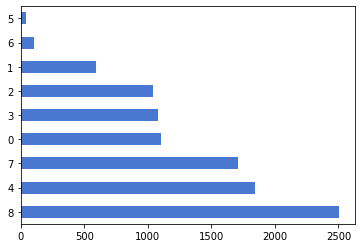

In [ ]:
df_audio_text_complete_init_end['label'].value_counts().plot.barh()

In [ ]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_subset = df_audio_text_complete_init_end[df_audio_text_complete_init_end['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df_audio_text_subset.shape)
display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_subset['label'] = df_audio_text_subset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df_audio_text_subset.head()

(7523, 527)


,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,7,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.89

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,4,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,5,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.89

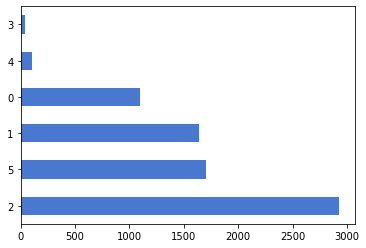

In [ ]:
df_audio_text_subset['label'].value_counts().plot.barh()

In [ ]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_fullset = df_audio_text_complete_init_end.copy()
# print(df_audio_text_subset.shape)
# display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_fullset['label'] = df_audio_text_fullset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6})
df_audio_text_fullset.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,6,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,4,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

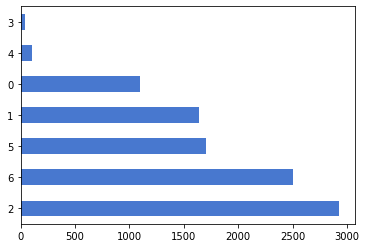

In [ ]:
df_audio_text_fullset['label'].value_counts().plot.barh()

In [ ]:
df_audio_text_subset.columns[2:-1]

Index(['sig_mean_1', 'sig_mean_2', 'sig_std_1', 'sig_std_2', 'rmse_mean_1',
       'rmse_mean_2', 'rmse_std_1', 'rmse_std_2', 'silence_1', 'silence_2',
       ...
       'Var_171', 'Var_172', 'Var_173', 'Var_174', 'Var_175', 'Var_176',
       'Var_177', 'Var_178', 'Var_179', 'Var_180'],
      dtype='object', length=524)

In [ ]:
#scalar = StandardScaler()
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])
df_audio_text_subset.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,4,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,5,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.89

In [ ]:
X_audio_text=df_audio_text_subset.drop(columns=['wav_file','label'])
y_audio_text=df_audio_text_subset['label']

In [ ]:
y_audio_text.head()

0    5
1    2
3    4
4    5
6    0
Name: label, dtype: int64

In [ ]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'sad': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5}

emo_keys_new = list(['ang', 'hap', 'sad', 'fea', 'sur', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict_new))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys_new)

In [ ]:
X_train_val_split, X_test_split, y_train_val_split, y_test_split = train_test_split(X_audio_text,y_audio_text, test_size=0.20,random_state=100,stratify=y_audio_text)

In [ ]:
X_train_val_split.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
166,0.022173,0.004353,0.037988,0.007073,0.027961,0.005602,0.025571,0.004297,0.455696,0.101266,-0.021776,-0.013766,1.077872,1.628260,0.036277,0.026709,-407.39163,176.14914,-34.832855,-0.462260,28.118359,-6.096693,1.242620,-5.351490,-16.302347,4.507911,10.749841,7.213766,7.986027,2.392474,1.912848,-1.318435,-8.213703,-4.506883,-2.913226,-2.224474,-515.12384,203.29352,-62.007610,31.090906,...,0.000078,0.000028,0.000010,4.628867e-06,1.047630e-06,1.170834e-07,1.709204e-09,4.901892e-11,3.394717e-11,3.041246e-11,2.748746e-11,2.485971e-11,2.257335e-11,2.051539e-11,1.864305e-11,1.697836e-11,1.547756e-11,1.411534e-11,1.289023e-11,1.178548e-11,1.078965e-11,9.899539e-12,9.086948e-12,8.370945e-12,7.723522e-12,7.140971e-12,6.625532e-12,6.162471e-12,5.751158e-12,5.385959e-12,5.065488e-12,4.783916e-12,4.538274e-12,4.329598e-12,4.152392e-12,4.008346e-12,3.893092e-12,3.811359e-12,3.761150e-12,presents ? it was only a trivial little brooch .
3051,0.012148,0.006247,0.018037,0.009387,0.015360,0.007954,0.009504,0.005020,0.088608,0.240506,0.001808,-0.005452,0.218021,0.246268,0.059706,0.073862,-447.20673,218.00348,-41.517270,16.987442,28.054703,-23.682432,12.581651,11.753182,-14.260317,-3.090917,-9.879278,-8.892808,2.631774,-7.881443,-6.780021,-2.307780,-5.701662,-0.405278,-6.303254,-8.115135,-525.86224,210.43008,-46.170700,12.554903,...,0.000025,0.000014,0.000005,1.612021e-06,3.516347e-07,3.030370e-08,1.106159e-09,1.628417e-10,1.396167e-10,1.270728e-10,1.153584e-10,1.039928e-10,9.370433e-11,8.426925e-11,7.566738e-11,6.804501e-11,6.123309e-11,5.512896e-11,4.972380e-11,4.492490e-11,4.066405e-11,3.690770e-11,3.353738e-11,3.060646e-11,2.798329e-11,2.565973e-11,2.362373e-11,2.182037e-11,2.023317e-11,1.884043e-11,1.762554e-11,1.656543e-11,1.564964e-11,1.487238e-11,1.421885e-11,1.368934e-11,1.326825e-11,1.296664e-11,1.278233e-11,oh yeah absolutely . you know and especially b...
28,0.002426,0.001478,0.003749,0.001869,0.003115,0.001848,0.002146,0.000288,0.000000,0.000000,-0.005043,-0.008122,0.009810,0.007638,0.001927,0.004233,-532.57590,215.78499,-76.297500,34.335170,30.068764,-29.737638,27.194527,5.306614,-13.043491,15.751520,-9.499388,-2.979486,15.054889,-5.029035,5.966687,6.987349,-8.333516,6.245324,2.672303,-6.697429,-637.91640,255.05031,-57.610012,35.446358,...,0.002978,0.001291,0.000330,1.099311e-04,1.379914e-05,8.292041e-06,7.133601e-07,1.558829e-08,2.390412e-11,1.524686e-11,1.130444e-11,8.531746e-12,6.572208e-12,5.142802e-12,4.083082e-12,3.290661e-12,2.686461e-12,2.216965e-12,1.848100e-12,1.559329e-12,1.326976e-12,1.138692e-12,9.844864e-13,8.616873e-13,7.574133e-13,6.692837e-13,5.980590e-13,5.382131e-13,4.891986e-13,4.437898e-13,4.113193e-13,3.784558e-13,3.514070e-13,3.297014e-13,3.137690e-13,2.982934e-13,2.882208e-13,2.800474e-13,2.746888e-13,okay . is that is that
6823,0.010351,0.010085,0.015035,0.016748,0.012909,0.013200,0.007607,0.010910,0.101266,0.278481,-0.010983,-0.005230,0.148140,0.195500,0.204876,0.219525,-499.15475,220.26312,-21.009844,-7.049796,20.483292,-11.696614,2.622640,1.912124,-20.617981,-12.801587,-9.048816,-5.847357,8.912958,1.765698,-6.815252,4.436724,7.166407,0.871645,0.777205,0.930147,-457.38810,207.70439,-55.214993,0.983842,...,0.000040,0.000010,0.000003,8.331350

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_val_split,y_train_val_split, test_size=0.20,random_state=100,stratify=y_train_val_split)

In [ ]:
X_train_split.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
4549,0.004341,0.001924,0.009843,0.002734,0.005726,0.002458,0.008609,0.001218,0.291139,0.113924,-0.006224,-0.006409,0.083005,0.149686,0.004792,0.005202,-518.99994,155.01155,-38.593570,34.293774,23.478645,-16.653502,16.983316,-8.972191,-14.369136,14.658336,-8.049690,-7.475609,5.251380,-8.237527,2.155298,2.170537,-10.515731,1.798983,-0.428932,-8.446993,-613.17694,221.53409,-43.826650,21.604233,...,0.000165,6.813421e-05,4.739329e-05,1.684610e-05,2.799017e-06,9.094237e-08,2.324356e-08,1.878315e-08,1.621756e-08,1.407327e-08,1.232767e-08,1.082293e-08,9.562356e-09,8.473730e-09,7.525477e-09,6.712904e-09,6.005719e-09,5.383338e-09,4.840199e-09,4.363180e-09,3.943792e-09,3.575580e-09,3.247774e-09,2.963438e-09,2.708998e-09,2.484744e-09,2.288432e-09,2.114640e-09,1.961681e-09,1.827339e-09,1.710385e-09,1.608549e-09,1.520133e-09,1.445613e-09,1.382404e-09,1.331320e-09,1.290750e-09,1.261501e-09,1.243558e-09,i m sorry sir .
7921,0.003341,0.006856,0.005252,0.011049,0.004139,0.008506,0.003199,0.006984,0.303797,0.341772,0.002445,-0.007185,0.019428,0.031064,0.087441,0.130181,-583.00616,205.61124,-24.222937,30.058695,21.566492,-24.358627,15.352074,4.412619,-12.306042,11.406200,-0.191160,-1.769029,10.330853,-1.768542,2.754668,6.734168,-3.863809,2.828455,3.550475,-3.973151,-505.96390,182.24477,-37.201183,32.294620,...,0.000279,1.231265e-04,3.944791e-05,8.699324e-06,1.184124e-06,9.190524e-08,1.623266e-09,1.155122e-11,5.334261e-13,4.409489e-13,3.898820e-13,3.491105e-13,3.147307e-13,2.838422e-13,2.558925e-13,2.310831e-13,2.088652e-13,1.888241e-13,1.709396e-13,1.550266e-13,1.408012e-13,1.282139e-13,1.168660e-13,1.069682e-13,9.804981e-14,9.011584e-14,8.318266e-14,7.707305e-14,7.175116e-14,6.699471e-14,6.269527e-14,5.887679e-14,5.563321e-14,5.290526e-14,5.064568e-14,4.880756e-14,4.732986e-14,4.627127e-14,4.562551e-14,no so is everyone else in the long run . let s...
4173,0.001640,0.001890,0.005132,0.004121,0.002249,0.002389,0.004815,0.003454,0.746835,0.645570,-0.011703,-0.010813,0.024341,0.025169,0.014329,0.029004,-633.00220,166.16942,-11.435686,13.838784,28.075304,-5.075028,7.984867,9.577755,-4.213651,3.067632,-1.309718,-6.861309,2.092822,3.269555,2.685006,3.278825,-0.576126,0.362828,-0.674103,-4.585681,-631.69464,175.87383,-19.630537,23.984844,...,0.000044,2.918401e-05,1.052347e-05,1.090679e-06,1.212805e-07,1.064523e-08,6.220263e-10,4.073369e-11,2.400869e-11,1.949949e-11,1.617611e-11,1.355598e-11,1.150151e-11,9.833996e-12,8.460186e-12,7.333699e-12,6.393564e-12,5.598869e-12,4.928621e-12,4.358258e-12,3.870611e-12,3.454233e-12,3.091835e-12,2.783643e-12,2.514340e-12,2.281242e-12,2.079745e-12,1.903872e-12,1.751481e-12,1.619566e-12,1.505798e-12,1.407375e-12,1.323163e-12,1.252210e-12,1.192863e-12,1.145057e-12,1.107337e-12,1.080301e-12,1.063710e-12,and what about me ?
1776,0.001973,0.002618,0.002481,0.003373,0.002446,0.003260,0.000426,0.000853,0.000000,0.000000,-0.005602,-0.021917,0.003364,0.009772,0.006451,0.025208,-611.99220,246.13736,-50.325897,29.357311,31.918331,-22.457115,23.962032,7.010523,-10.857779,17.043339,-1.380079,-0.745597,15.504441,-0.041524,3.934133,4.584380,-5.862716,6.040644,4.022137,-4.626023,-586.51556,226.45157,-39.346810,24.417454,...,0.000001,4.922699e-07,1.844339e-07,7.203211e-

In [ ]:
# scalar = StandardScaler()
# X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
# X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
# X_test_split[X_test_split.columns[:-1]] = scalar.fit_transform(X_test_split[X_test_split.columns[:-1]])
# #df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [ ]:
#X_train_split.head()

In [ ]:
X_train_val_split_rf = X_train_val_split.copy()
X_test_split_rf = X_test_split.copy()

In [ ]:
scalar = StandardScaler()
X_train_val_split_rf[X_train_val_split_rf.columns[:-1]] = scalar.fit_transform(X_train_val_split_rf[X_train_val_split_rf.columns[:-1]])
X_test_split_rf[X_test_split_rf.columns[:-1]] = scalar.transform(X_test_split_rf[X_test_split_rf.columns[:-1]])

In [ ]:
scalar = StandardScaler()
X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
X_test_split[X_test_split.columns[:-1]] = scalar.transform(X_test_split[X_test_split.columns[:-1]])
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [ ]:
#X_train_val_subset, X_test_subset, y_train_val_subset, y_test_subset = train_test_split(df_audio_text_subset,df_audio_text_subset['label'], test_size=0.20,random_state=100,stratify=df_audio_text_subset['label'])

In [ ]:
df_audio_text_train_val_subset_rf = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03|Ses04')]
df_audio_text_train_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
df_audio_text_val_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
df_audio_text_test_subset = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
df_audio_text_test_subset_rf = df_audio_text_test_subset.copy()


In [ ]:
#X_train_session_based = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
X_train_session_based = df_audio_text_train_subset.drop(columns=['wav_file','label'])
y_train_session_based = df_audio_text_train_subset['label']
#X_train_session_based.drop(columns=['wav_file','label'],inplace=True)

In [ ]:
X_test_session_based = df_audio_text_test_subset.drop(columns=['wav_file','label'])
y_test_session_based = df_audio_text_test_subset['label']
#X_test_session_based = X_test_subset.drop(columns=['wav_file','label'])
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
#y_test_session_based = y_test_subset.copy()
#X_test_session_based.drop(columns=['wav_file','label'],inplace=True)

In [ ]:
X_val_session_based = df_audio_text_val_subset.drop(columns=['wav_file','label'])
y_val_session_based = df_audio_text_val_subset['label']
#X_val_session_based = X_train_val_subset[X_train_val_subset['wav_file'].str.contains('Ses05')]
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
#y_val_session_based = X_val_session_based['label']
#X_val_session_based.drop(columns=['wav_file','label'],inplace=True)
#X_val_session_based['label']
#X_val_session_based.drop(columns=['wav_file','label'],inplace=True)

In [ ]:
X_train_val_session_based_rf = df_audio_text_train_val_subset_rf.drop(columns=['wav_file','label'])
y_train_val_session_based_rf = df_audio_text_train_val_subset_rf['label']

In [ ]:
X_test_session_based_rf = df_audio_text_test_subset_rf.drop(columns=['wav_file','label'])
y_test_session_based_rf = df_audio_text_test_subset_rf['label']

In [ ]:
print(X_train_session_based.shape,X_val_session_based.shape,X_test_session_based.shape)

(4339, 525) (1538, 525) (1646, 525)


In [ ]:
scalar = StandardScaler()
X_train_session_based[X_train_session_based.columns[:-1]] = scalar.fit_transform(X_train_session_based[X_train_session_based.columns[:-1]])
X_val_session_based[X_val_session_based.columns[:-1]] = scalar.transform(X_val_session_based[X_val_session_based.columns[:-1]])
X_test_session_based[X_test_session_based.columns[:-1]] = scalar.transform(X_test_session_based[X_test_session_based.columns[:-1]])

In [ ]:
scalar = StandardScaler()
X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]] = scalar.fit_transform(X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]])
X_test_session_based_rf[X_test_session_based_rf.columns[:-1]] = scalar.transform(X_test_session_based_rf[X_test_session_based_rf.columns[:-1]])

In [ ]:
X_test_session_based_rf.shape

(1646, 525)

In [ ]:
import pandas as pd
import numpy as np
import pickle
import re

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# features = tfidf.fit_transform(df_text.transcription).toarray()

# labels = df_text.label
# print(features.shape)

In [ ]:
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

Test Set Accuracy =  0.496
Test Set F-score =  0.299
Test Set Precision =  0.343
Test Set Recall =  0.292
Confusion matrix, without normalization
[[ 72  21 116   0   0  11]
 [ 15 121 148   0   0  43]
 [ 28  38 461   0   0  59]
 [  0   2   5   0   0   1]
 [  2   0  16   0   0   4]
 [  9  32 209   0   0  92]]


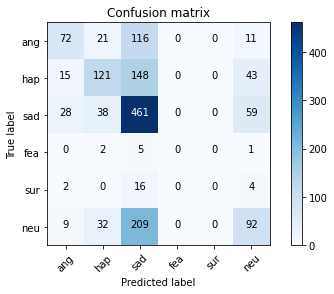

In [ ]:
rf_classifier_split = RandomForestClassifier(n_estimators=600, min_samples_split=25)
rf_classifier_split.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split)

# Predict
pred_probs = rf_classifier_split.predict_proba(X_test_split_rf.drop(columns=['transcription']))

# Results
display_results(y_test_split, pred_probs)

In [ ]:
rf_classifier_split

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
kfolds = 4

param_grid = {'n_estimators': [400, 500, 600], 'min_samples_split':[25, 35, 50],'max_depth':[2, 4, 6] , 'min_samples_leaf':[2, 5, 10] }

In [ ]:
rf_classifier_split = RandomForestClassifier(max_features='sqrt',random_state=100)
model_cv = GridSearchCV(estimator = rf_classifier_split, param_grid=param_grid, scoring='accuracy',cv=kfolds,verbose=1, return_train_score=True,n_jobs=-1)
model_cv.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split )

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 55.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,9.058625,0.047279,0.113379,0.008771,2,2,25,400,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.433223,0.435880,0.428191,0.420213,0.429377,0.005968,55,0.434301,0.432085,0.430882,0.434648,0.432979,0.001560
1,11.291824,0.047240,0.135206,0.003102,2,2,25,500,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.431229,0.434551,0.426862,0.420213,0.428214,0.005364,73,0.434301,0.430977,0.430660,0.433762,0.432425,0.001621
2,13.535233,0.035470,0.165181,0.005041,2,2,25,600,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.432558,0.435216,0.426862,0.419548,0.428546,0.006008,64,0.435409,0.431420,0.430882,0.433983,0.432924,0.001853
3,9.064383,0.076303,0.108878,0.011431,2,2,35,400,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.433223,0.435880,0.428191,0.420213,0.429377,0.005968,55,0.434301,0.432085,0.430882,0.434648,0.432979,0.001560
4,11.322069,0.067002,0.134058,0.013296,2,2,35,500,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.431229,0.434551,0.426862,0.420213,0.428214,0.005364,73,0.434301,0.430977,0.430660,0.433762,0.432425,0.001621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,28.221328,0.108726,0.156625,0.001511,6,10,35,500,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.469767,0.487708,0.481383,0.462101,0.475240,0.009947,6,0.592511,0.580988,0.587284,0.590607,0.587847,0.004380
77,33.904950,0.096848,0.186082,0.003200,6,10,35,600,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.472425,0.487708,0.480053,0.465426,0.476403,0.008328,1,0.591846,0.580324,0.587949,0.588613,0.587183,0.004226
78,22.436191,0.033514,0.127019,0.003922,6,10,50,400,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.465116,0.489037,0.480718,0.464096,0.474742,0.010560,10,0.586971,0.574341,0.576650,0.579087,0.579262,0.004757
79,28.093392,0.173889,0.157095,0.004580,6,10,50,500,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.464452,0.489701,0.482048,0.464096,0.475074,0.011135,7,0.587636,0.572790,0.577315,0.581967,0.579927,0.005508


In [ ]:
model_cv.best_score_, model_cv.best_estimator_,model_cv.best_params_

(0.476402903442426,
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=6, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=10, min_samples_split=35,
                        min_weight_fraction_leaf=0.0, n_estimators=600,
                        n_jobs=None, oob_score=False, random_state=100,
                        verbose=0, warm_start=False),
 {'max_depth': 6,
  'min_samples_leaf': 10,
  'min_samples_split': 35,
  'n_estimators': 600})

Test Set Accuracy =  0.474
Test Set F-score =  0.278
Test Set Precision =  0.331
Test Set Recall =  0.274
Confusion matrix, without normalization
[[ 70  18 125   0   0   7]
 [ 17  96 172   0   0  42]
 [ 30  41 468   0   0  47]
 [  0   1   6   0   0   1]
 [  2   0  17   0   0   3]
 [  5  29 229   0   0  79]]


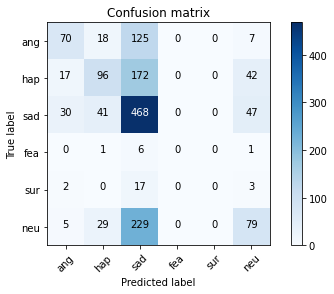

In [ ]:
rf_classifier_split_final = RandomForestClassifier(max_features='sqrt',max_depth= 6,
  min_samples_leaf= 10,
  min_samples_split= 35,
  n_estimators = 600, random_state=100)
rf_classifier_split_final.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split)

# Predict
pred_probs_rf_split = rf_classifier_split_final.predict_proba(X_test_split_rf.drop(columns=['transcription']))

# Results
display_results(y_test_split, pred_probs_rf_split)

Test Set Accuracy =  0.449
Test Set F-score =  0.249
Test Set Precision =  0.327
Test Set Recall =  0.258
Confusion matrix, without normalization
[[ 54   8 100   0   0   6]
 [ 19  52 270   0   0 101]
 [ 17  21 539   0   0  47]
 [  0   0   7   0   0   3]
 [  0   1  15   0   0   2]
 [  1  12 277   0   0  94]]


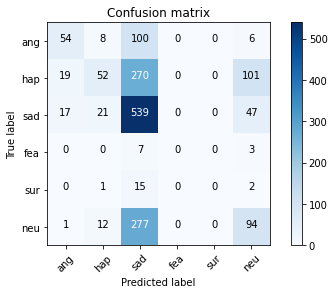

In [ ]:
rf_classifier_session_based_rf = RandomForestClassifier(max_features='sqrt', max_depth= 6,
  min_samples_leaf= 10,
  min_samples_split= 35,
  n_estimators = 600, random_state=100 )
rf_classifier_session_based_rf.fit(X_train_val_session_based_rf.drop(columns=['transcription']), y_train_val_session_based_rf)

# Predict
pred_probs_sb_rf = rf_classifier_session_based_rf.predict_proba(X_test_session_based_rf.drop(columns=['transcription']))

# Results
display_results(y_test_session_based_rf, pred_probs_sb_rf)

In [ ]:
from datetime import datetime

In [ ]:
import joblib
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_rf_session_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model_rf_0.449_'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.joblib'
joblib.dump(rf_classifier_session_based_rf,local_filename)

['/content/drive/My Drive/IEMOCAP/model_outputs/model_rf_session_init_end/model_rf_0.449_2021-10-2408_04_17.759286.joblib']

In [ ]:
rf_test=joblib.load(local_filename)

Test Set Accuracy =  0.449
Test Set F-score =  0.249
Test Set Precision =  0.327
Test Set Recall =  0.258
Confusion matrix, without normalization
[[ 54   8 100   0   0   6]
 [ 19  52 270   0   0 101]
 [ 17  21 539   0   0  47]
 [  0   0   7   0   0   3]
 [  0   1  15   0   0   2]
 [  1  12 277   0   0  94]]


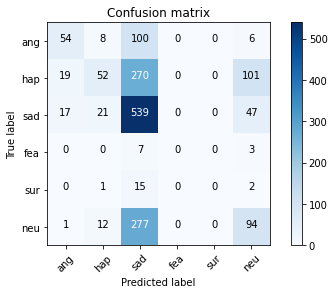

In [ ]:
pred_rf_test = rf_test.predict_proba(X_test_session_based_rf.drop(columns=['transcription']))

# Results
display_results(y_test_session_based_rf, pred_rf_test)

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
X_train_split_cnn = X_train_split.drop(columns=['transcription'])
X_val_split_cnn = X_val_split.drop(columns=['transcription'])
X_test_split_cnn = X_test_split.drop(columns=['transcription'])

In [ ]:
X_val_split_cnn.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
8590,-0.561651,-0.193132,-0.595946,-0.226476,-0.571981,-0.209231,-0.597553,-0.234917,-1.133794,0.530650,-0.044275,-0.041009,-0.190857,-0.189475,-0.148548,-0.148637,-0.877442,0.541777,-0.603659,0.710451,0.007398,-0.475220,0.986305,-0.061659,-0.288874,1.370557,0.369564,0.173190,1.017123,-0.136182,0.502562,1.208232,0.286588,1.337378,1.209362,0.412380,-0.056633,-0.127927,1.889284,-0.970091,...,-0.134356,-0.125688,-0.116273,-0.091719,-0.070567,-0.060017,-0.058019,-0.057867,-0.069203,-0.074515,-0.074252,-0.074487,-0.074817,-0.075166,-0.075508,-0.075833,-0.076136,-0.076417,-0.076677,-0.076916,-0.077137,-0.077339,-0.077526,-0.077697,-0.077853,-0.077999,-0.078130,-0.078250,-0.078360,-0.078459,-0.078550,-0.078631,-0.078703,-0.078767,-0.078825,-0.078872,-0.078911,-0.078943,-0.078968,-0.078982
2223,-0.480825,-0.409587,-0.499368,-0.422715,-0.493484,-0.421845,-0.474250,-0.399471,1.032388,1.373796,-0.030944,-0.019049,-0.187787,-0.184218,-0.160640,-0.165628,-0.757117,0.418625,0.997761,-0.792901,-1.104349,0.341160,0.195777,0.906834,0.307621,-0.070591,0.702271,0.231667,0.254757,0.318133,-0.712855,0.516005,0.703687,-0.760080,-0.327607,-0.426461,-0.618300,0.189144,1.399617,-1.048835,...,-0.136449,-0.127446,-0.118322,-0.092710,-0.070846,-0.060092,-0.058033,-0.057868,-0.069206,-0.074539,-0.074280,-0.074516,-0.074848,-0.075200,-0.075543,-0.075868,-0.076172,-0.076454,-0.076714,-0.076954,-0.077175,-0.077377,-0.077564,-0.077735,-0.077892,-0.078038,-0.078169,-0.078290,-0.078400,-0.078499,-0.078590,-0.078670,-0.078743,-0.078807,-0.078865,-0.078912,-0.078951,-0.078983,-0.079008,-0.079022
7433,-0.560584,-0.338235,-0.577109,-0.277766,-0.569964,-0.334760,-0.544508,-0.169672,-1.133794,0.530650,-0.051006,-0.027854,-0.190343,-0.188578,-0.149824,-0.156868,-1.174495,-0.278321,1.297226,0.500542,0.317519,0.734486,-0.088393,0.533060,1.007249,0.596765,0.897802,-0.473688,-0.216026,0.918781,0.577021,0.900890,0.769270,0.245725,1.223271,0.955504,-0.091189,-0.915445,1.860851,-1.432188,...,-0.134951,-0.125267,-0.116514,-0.091596,-0.070510,-0.059978,-0.058022,-0.057866,-0.069206,-0.074538,-0.074276,-0.074511,-0.074842,-0.075192,-0.075534,-0.075859,-0.076162,-0.076443,-0.076703,-0.076942,-0.077163,-0.077365,-0.077552,-0.077722,-0.077879,-0.078024,-0.078156,-0.078276,-0.078386,-0.078485,-0.078576,-0.078656,-0.078729,-0.078793,-0.078850,-0.078897,-0.078937,-0.078969,-0.078993,-0.079008
5878,0.359046,0.211103,0.713016,0.783904,0.401140,0.252777,1.061311,1.414747,1.032388,2.476372,-0.015698,-0.056726,0.105652,0.107529,0.134818,0.167594,1.142259,-1.121974,-0.208879,-1.085942,1.207285,0.730433,-2.155639,-0.833948,1.184885,-1.251913,-1.050123,-0.779440,-0.703086,0.884761,-0.215590,-1.947904,-0.636882,-0.792138,-0.733879,0.466364,0.798629,-2.430094,0.851363,-1.346963,...,-0.115948,-0.110643,-0.103940,-0.085019,-0.065375,-0.057805,-0.057324,-0.054655,0.070991,0.816946,0.826233,0.837806,0.848587,0.858114,0.866434,0.873648,0.879895,0.885326,0.890106,0.894292,0.897945,0.901185,0.904071,0.906613,0.908833,0.910893,0.912674,0.914280,0.915687,0.916974,0.918084,0.919092,0.919929,0.920696,0.921368,0.921932,0.922383,0.922731,0.923047,0.923198
2777,-0.440977,-0.439775,-0.474956,-0.448921,-0.442708,-0.448382,-0.493033,-0.413769,0.519345

In [ ]:
X_train_split_cnn = X_train_split_cnn.values.reshape(X_train_split_cnn.shape[0],X_train_split_cnn.shape[1],1)
X_val_split_cnn = X_val_split_cnn.values.reshape(X_val_split_cnn.shape[0],X_val_split_cnn.shape[1],1)
X_test_split_cnn = X_test_split_cnn.values.reshape(X_test_split_cnn.shape[0],X_test_split_cnn.shape[1],1)

In [ ]:
### Try CNN Models

In [ ]:
model_1d_split = Sequential()
model_1d_split.add(Conv1D(254,5,padding='same',input_shape=(X_train_split_cnn[0].shape))) # there are 8 features
model_1d_split.add(Activation('relu'))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Dropout(0.1))
model_1d_split.add(MaxPooling1D(pool_size=(8)))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Activation('relu'))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Activation('relu'))
model_1d_split.add(Flatten())
model_1d_split.add(Dense(6))
model_1d_split.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model_1d_split.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 524, 254)          1524      
_________________________________________________________________
activation (Activation)      (None, 524, 254)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 524, 128)          162688    
_________________________________________________________________
dropout (Dropout)            (None, 524, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 65, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 65, 128)           82048     
_________________________________________________________________
activation_1 (Activation)    (None, 65, 128)           0

In [ ]:
def plot_history(history_model):
    # summarize history for accuracy
    plt.plot(history_model.history['sparse_categorical_accuracy'])
    plt.plot(history_model.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('categorical accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_model.history['loss'])
    plt.plot(history_model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
from datetime import datetime

In [ ]:
output_dir

'/content/drive/My Drive/IEMOCAP/model_outputs'

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_1d_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
#print(filepath)
model_checkpoint = ModelCheckpoint(filepath=local_filename,
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
model_1d_split.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['sparse_categorical_accuracy'])

In [ ]:
model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=32,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 18s 12ms/step - loss: 1.3464 - sparse_categorical_accuracy: 0.4273 - val_loss: 1.2960 - val_sparse_categorical_accuracy: 0.4518
Epoch 2/30
151/151 [==============================] - 1s 10ms/step - loss: 1.2470 - sparse_categorical_accuracy: 0.4776 - val_loss: 1.3324 - val_sparse_categorical_accuracy: 0.4527

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
151/151 [==============================] - 1s 10ms/step - loss: 1.1661 - sparse_categorical_accuracy: 0.5191 - val_loss: 1.2571 - val_sparse_categorical_accuracy: 0.4659
Epoch 4/30
151/151 [==============================] - 1s 10ms/step - loss: 1.1452 - sparse_categorical_accuracy: 0.5260 - val_loss: 1.2542 - val_sparse_categorical_accuracy: 0.4718

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
151/151 [==============================] - 1s 10ms/step - loss: 1.1274 - sparse_categorical_accuracy

In [ ]:
model_1d_split_hist.history

{'loss': [1.346447467803955,
  1.246975064277649,
  1.166133165359497,
  1.1452422142028809,
  1.1274158954620361,
  1.125347375869751,
  1.1254596710205078],
 'lr': [0.001,
  0.001,
  0.000100000005,
  0.000100000005,
  1.0000001e-05,
  1.0000001e-06,
  1.0000001e-07],
 'sparse_categorical_accuracy': [0.42729538679122925,
  0.4775654375553131,
  0.519110918045044,
  0.5259659290313721,
  0.5378063917160034,
  0.5340673327445984,
  0.537390947341919],
 'val_loss': [1.2959765195846558,
  1.3323830366134644,
  1.257115125656128,
  1.25420081615448,
  1.26282799243927,
  1.263092279434204,
  1.2631175518035889],
 'val_sparse_categorical_accuracy': [0.4518272280693054,
  0.4526578187942505,
  0.46594685316085815,
  0.4717608094215393,
  0.4717608094215393,
  0.47093021869659424,
  0.47093021869659424]}

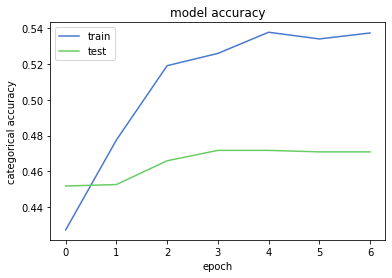

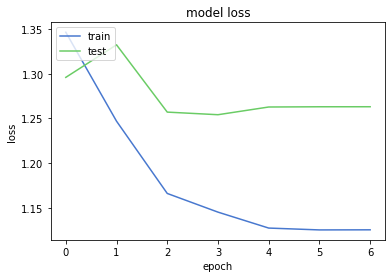

In [ ]:
plot_history(model_1d_split_hist)

In [ ]:
pred_y_1d_split = model_1d_split.predict(X_test_split_cnn)

In [ ]:
pred_y_1d_split.shape

(1505, 6)

In [ ]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [ ]:
#pred_y_split.shape

In [ ]:
#pred_y_split.shape

Test Set Accuracy =  0.496
Test Set F-score =  0.300
Test Set Precision =  0.338
Test Set Recall =  0.294
Confusion matrix, without normalization
[[ 75  23 110   0   0  12]
 [ 17 116 149   0   0  45]
 [ 33  41 456   0   0  56]
 [  1   2   4   0   0   1]
 [  2   4  13   0   0   3]
 [  7  36 200   0   0  99]]


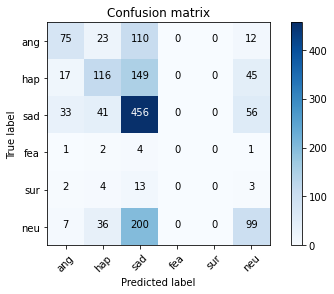

In [ ]:
display_results(y_test_split, pred_y_1d_split)

In [ ]:
el_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=64,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
76/76 [==============================] - 1s 16ms/step - loss: 1.1242 - sparse_categorical_accuracy: 0.5366 - val_loss: 1.2631 - val_sparse_categorical_accuracy: 0.4718
Epoch 2/30
76/76 [==============================] - 1s 15ms/step - loss: 1.1246 - sparse_categorical_accuracy: 0.5391 - val_loss: 1.2632 - val_sparse_categorical_accuracy: 0.4718
Epoch 3/30
76/76 [==============================] - 1s 15ms/step - loss: 1.1247 - sparse_categorical_accuracy: 0.5372 - val_loss: 1.2632 - val_sparse_categorical_accuracy: 0.4718
Epoch 4/30
76/76 [==============================] - 1s 15ms/step - loss: 1.1255 - sparse_categorical_accuracy: 0.5366 - val_loss: 1.2632 - val_sparse_categorical_accuracy: 0.4718
Epoch 00004: early stopping


In [ ]:
el_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=16,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
301/301 [==============================] - 2s 7ms/step - loss: 1.1256 - sparse_categorical_accuracy: 0.5372 - val_loss: 1.2632 - val_sparse_categorical_accuracy: 0.4718
Epoch 2/30
301/301 [==============================] - 2s 7ms/step - loss: 1.1244 - sparse_categorical_accuracy: 0.5374 - val_loss: 1.2633 - val_sparse_categorical_accuracy: 0.4718
Epoch 3/30
301/301 [==============================] - 2s 7ms/step - loss: 1.1256 - sparse_categorical_accuracy: 0.5351 - val_loss: 1.2633 - val_sparse_categorical_accuracy: 0.4718
Epoch 4/30
301/301 [==============================] - 2s 7ms/step - loss: 1.1248 - sparse_categorical_accuracy: 0.5366 - val_loss: 1.2634 - val_sparse_categorical_accuracy: 0.4718
Epoch 00004: early stopping


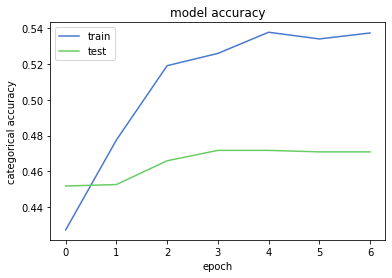

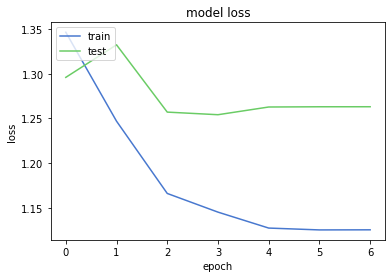

In [ ]:
plot_history(model_1d_split_hist)

In [ ]:
pred_y_1d_split = model_1d_split.predict(X_test_split_cnn)

In [ ]:
pred_y_1d_split.shape

(1505, 6)

Test Set Accuracy =  0.495
Test Set F-score =  0.300
Test Set Precision =  0.337
Test Set Recall =  0.294
Confusion matrix, without normalization
[[ 75  23 110   0   0  12]
 [ 17 116 149   0   0  45]
 [ 34  41 455   0   0  56]
 [  1   2   4   0   0   1]
 [  2   4  13   0   0   3]
 [  7  36 200   0   0  99]]


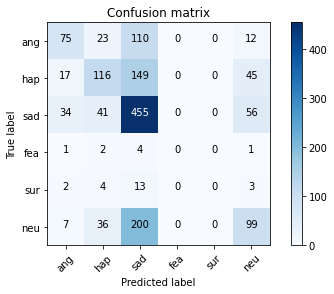

In [ ]:
display_results(y_test_split, pred_y_1d_split)

In [ ]:
#from sklearn.metrics import balanced_accuracy_score

In [ ]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
from datetime import datetime

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_2d_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_') +'.h5'
#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
X_train_split_cnn_2d = np.expand_dims(X_train_split_cnn, -1)
X_val_split_cnn_2d = np.expand_dims(X_val_split_cnn, -1)
X_test_split_cnn_2d = np.expand_dims(X_test_split_cnn, -1)

In [ ]:
X_train_split_cnn.shape

(4814, 524, 1)

In [ ]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_split_2d = Sequential()
model_split_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_split_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_split_2d.add(Activation('relu'))
model_split_2d.add(Conv2D(128,5,padding='same'))
model_split_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_split_2d.add(Conv2D(128,5,padding='same'))
model_split_2d.add(Activation('relu'))
model_split_2d.add(Flatten())
model_split_2d.add(Dense(6))
model_split_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model_split_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
              y_train_split,
              epochs=30,
              batch_size=32,
              validation_data=(X_val_split_cnn_2d, y_val_split),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 6s 35ms/step - loss: 1.3237 - sparse_categorical_accuracy: 0.4445 - val_loss: 1.2652 - val_sparse_categorical_accuracy: 0.4518
Epoch 2/30
151/151 [==============================] - 5s 32ms/step - loss: 1.2034 - sparse_categorical_accuracy: 0.5008 - val_loss: 1.2883 - val_sparse_categorical_accuracy: 0.4751

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
151/151 [==============================] - 5s 32ms/step - loss: 1.0937 - sparse_categorical_accuracy: 0.5542 - val_loss: 1.2575 - val_sparse_categorical_accuracy: 0.4784

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
151/151 [==============================] - 5s 32ms/step - loss: 1.0543 - sparse_categorical_accuracy: 0.5665 - val_loss: 1.2530 - val_sparse_categorical_accuracy: 0.4826
Epoch 5/30
151/151 [==============================] - 5s 32ms/step - loss: 1.0508 - sparse_categorical_accuracy:

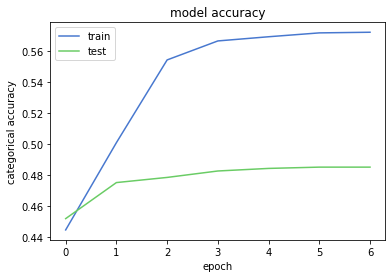

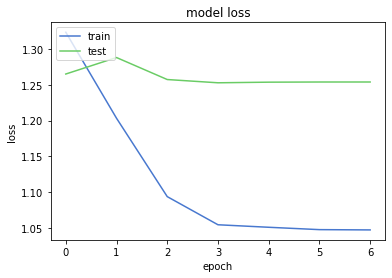

In [ ]:
plot_history(model_history_split_2d)

In [ ]:
pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.504
Test Set F-score =  0.320
Test Set Precision =  0.336
Test Set Recall =  0.315
Confusion matrix, without normalization
[[ 91  27  83   0   0  19]
 [ 27 138 128   0   0  34]
 [ 47  52 409   0   0  78]
 [  0   1   6   0   0   1]
 [  2   3  14   0   0   3]
 [  8  46 167   0   0 121]]


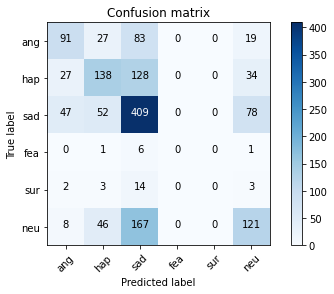

In [ ]:
display_results(y_test_split, pred_y_2d_split)

In [ ]:
model_split_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
              y_train_split,
              epochs=30,
              batch_size=64,
              validation_data=(X_val_split_cnn_2d, y_val_split),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
76/76 [==============================] - 5s 58ms/step - loss: 1.1078 - sparse_categorical_accuracy: 0.5499 - val_loss: 1.2587 - val_sparse_categorical_accuracy: 0.4850
Epoch 2/30
76/76 [==============================] - 4s 54ms/step - loss: 1.0211 - sparse_categorical_accuracy: 0.5812 - val_loss: 1.3724 - val_sparse_categorical_accuracy: 0.4850

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
76/76 [==============================] - 4s 53ms/step - loss: 0.9134 - sparse_categorical_accuracy: 0.6369 - val_loss: 1.3253 - val_sparse_categorical_accuracy: 0.4834

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
76/76 [==============================] - 4s 54ms/step - loss: 0.8761 - sparse_categorical_accuracy: 0.6510 - val_loss: 1.3376 - val_sparse_categorical_accuracy: 0.4900

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


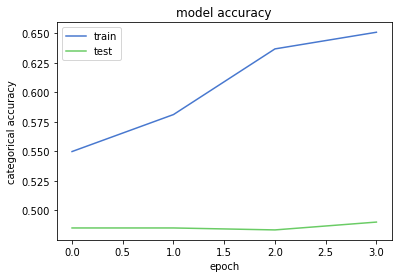

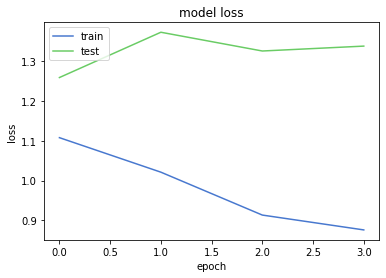

In [ ]:
plot_history(model_history_split_2d)

In [ ]:
pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.512
Test Set F-score =  0.327
Test Set Precision =  0.341
Test Set Recall =  0.322
Confusion matrix, without normalization
[[ 95  22  78   0   1  24]
 [ 30 139 119   0   0  39]
 [ 43  49 403   0   1  90]
 [  0   2   5   0   0   1]
 [  3   5   9   0   0   5]
 [  7  41 161   0   0 133]]


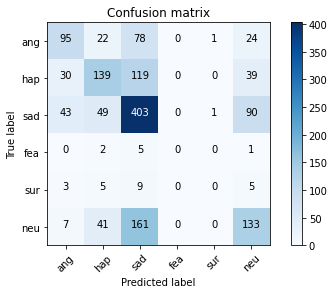

In [ ]:
display_results(y_test_split, pred_y_2d_split)

In [ ]:
model_split_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
              y_train_split,
              epochs=30,
              batch_size=16,
              validation_data=(X_val_split_cnn_2d, y_val_split),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
301/301 [==============================] - 6s 19ms/step - loss: 1.0627 - sparse_categorical_accuracy: 0.5708 - val_loss: 1.3192 - val_sparse_categorical_accuracy: 0.4485
Epoch 2/30
301/301 [==============================] - 6s 19ms/step - loss: 0.9732 - sparse_categorical_accuracy: 0.6016 - val_loss: 1.3196 - val_sparse_categorical_accuracy: 0.4668

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
301/301 [==============================] - 6s 19ms/step - loss: 0.7630 - sparse_categorical_accuracy: 0.7017 - val_loss: 1.5043 - val_sparse_categorical_accuracy: 0.4834

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
301/301 [==============================] - 6s 19ms/step - loss: 0.6955 - sparse_categorical_accuracy: 0.7399 - val_loss: 1.5276 - val_sparse_categorical_accuracy: 0.4909

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


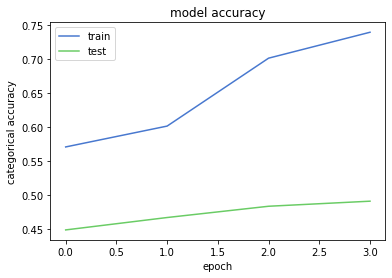

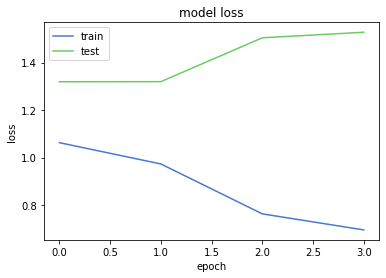

In [ ]:
plot_history(model_history_split_2d)

In [ ]:
pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.506
Test Set F-score =  0.338
Test Set Precision =  0.359
Test Set Recall =  0.332
Confusion matrix, without normalization
[[ 96  23  71   0   2  28]
 [ 32 143 104   0   1  47]
 [ 52  55 371   1   1 106]
 [  1   2   4   0   0   1]
 [  2   2   9   0   1   8]
 [ 15  49 127   0   1 150]]


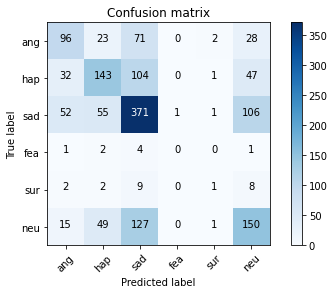

In [ ]:
display_results(y_test_split, pred_y_2d_split)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from transformers import BertTokenizer, TFBertModel, BertConfig, RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_dbert_split = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_dbert_split_text = tokenize(X_train_split['transcription'], tokenizer_dbert_split)
X_test_dbert_split_text = tokenize(X_test_split['transcription'], tokenizer_dbert_split)
X_val_dbert_split_text = tokenize(X_val_split['transcription'], tokenizer_dbert_split)

100%|██████████| 1204/1204 [00:00<00:00, 2418.24it/s]


In [ ]:
config_db_split = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_split = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_db_split)

input_ids_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_db_split = DistilBERT_split(input_ids = input_ids_in_db_split, attention_mask = input_masks_in_db_split)[0]
X_db_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_db_split)
X_db_split = tf.keras.layers.GlobalMaxPool1D()(X_db_split)
X_db_split = tf.keras.layers.Dense(64, activation='relu')(X_db_split)
X_db_split = tf.keras.layers.Dropout(0.2)(X_db_split)
X_db_split = tf.keras.layers.Dense(6, activation='softmax')(X_db_split)

model_dbert_split = tf.keras.Model(inputs=[input_ids_in_db_split, input_masks_in_db_split], outputs = X_db_split)

for layer in model_dbert_split.layers[:3]:
    layer.trainable = False

model_dbert_split.summary()

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 114, 256)     918528      tf_distil_bert_model[0][13]  

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_dbert_split_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_split.shape

(1204,)

In [ ]:
model_dbert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_split = model_dbert_split.fit(X_train_dbert_split_text, 
                    y_train_split, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_dbert_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 29s 137ms/step - loss: 1.2976 - sparse_categorical_accuracy: 0.4474 - val_loss: 1.1909 - val_sparse_categorical_accuracy: 0.5208
Epoch 2/30
151/151 [==============================] - 19s 124ms/step - loss: 1.1553 - sparse_categorical_accuracy: 0.5266 - val_loss: 1.1192 - val_sparse_categorical_accuracy: 0.5473
Epoch 3/30
151/151 [==============================] - 19s 123ms/step - loss: 1.0913 - sparse_categorical_accuracy: 0.5511 - val_loss: 1.0943 - val_sparse_categorical_accuracy: 0.5590
Epoch 4/30
151/151 [==============================] - 19s 124ms/step - loss: 1.0089 - sparse_categorical_accuracy: 0.5951 - val_loss: 1.0824 - val_sparse_categorical_accuracy: 0.5465
Epoch 5/30
151/151 [==============================] - 19s 123ms/step - loss: 0.9262 - sparse_categorical_accuracy: 0.6265 - val_loss: 1.0222 - val_sparse_categorical_accuracy: 0.5822
Epoch 6/30
151/151 [==============================] - 19s 124ms/step - loss: 0.8673 -

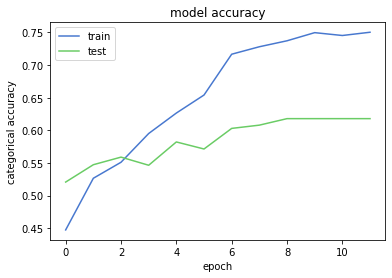

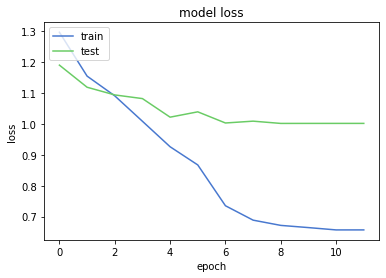

In [ ]:
plot_history(model_history_dbert_split)

In [ ]:
pred_y_dbert_split = model_dbert_split.predict(X_test_dbert_split_text)

Test Set Accuracy =  0.605
Test Set F-score =  0.512
Test Set Precision =  0.623
Test Set Recall =  0.482
Confusion matrix, without normalization
[[106  13  78   0   6  17]
 [  9 212  59   0   4  43]
 [ 45  39 421   0   1  80]
 [  0   3   2   2   0   1]
 [  2   6   4   0   7   3]
 [  9  35 130   0   6 162]]


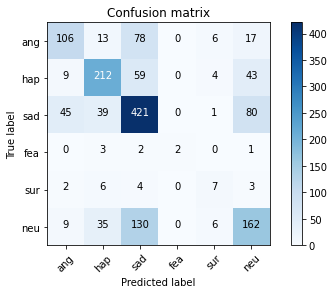

In [ ]:
display_results(y_test_split, pred_y_dbert_split)

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import BertTokenizer, BertConfig, TFBertModel, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'bert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_bert_split = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_bert_split_text = tokenize(X_train_split['transcription'], tokenizer_bert_split)
X_test_bert_split_text = tokenize(X_test_split['transcription'], tokenizer_bert_split)
X_val_bert_split_text = tokenize(X_val_split['transcription'], tokenizer_bert_split)

100%|██████████| 1204/1204 [00:00<00:00, 2334.42it/s]


In [ ]:
config_bert_split = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_split = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_split)

input_ids_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_split = BERT_split(input_ids = input_ids_in_bert_split, attention_mask = input_masks_in_bert_split)[0]
X_bert_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_split)
X_bert_split = tf.keras.layers.GlobalMaxPool1D()(X_bert_split)
X_bert_split = tf.keras.layers.Dense(64, activation='relu')(X_bert_split)
X_bert_split = tf.keras.layers.Dropout(0.2)(X_bert_split)
X_bert_split = tf.keras.layers.Dense(6, activation='softmax')(X_bert_split)

model_bert_split = tf.keras.Model(inputs=[input_ids_in_bert_split, input_masks_in_bert_split], outputs = X_bert_split)

for layer in model_bert_split.layers[:3]:
    layer.trainable = False

model_bert_split.summary()

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 114, 256)     918528      tf_bert_model[0][25]       

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_bert_split_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_split.shape

(1204,)

In [ ]:
model_bert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_split = model_bert_split.fit(X_train_bert_split_text, 
                    y_train_split, 
                    epochs = 25,
                    batch_size=32, 
                    validation_data=(X_val_bert_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
151/151 [==============================] - 50s 247ms/step - loss: 1.3130 - sparse_categorical_accuracy: 0.4420 - val_loss: 1.1500 - val_sparse_categorical_accuracy: 0.5399
Epoch 2/25
151/151 [==============================] - 34s 228ms/step - loss: 1.1633 - sparse_categorical_accuracy: 0.5258 - val_loss: 1.1131 - val_sparse_categorical_accuracy: 0.5449
Epoch 3/25
151/151 [==============================] - 34s 228ms/step - loss: 1.0721 - sparse_categorical_accuracy: 0.5688 - val_loss: 1.0623 - val_sparse_categorical_accuracy: 0.5507
Epoch 4/25
151/151 [==============================] - 34s 228ms/step - loss: 0.9971 - sparse_categorical_accuracy: 0.6026 - val_loss: 1.0084 - val_sparse_categorical_accuracy: 0.5839
Epoch 5/25
151/151 [==============================] - 34s 228ms/step - loss: 0.9264 - sparse_categorical_accuracy: 0.6305 - val_loss: 1.0033 - val_sparse_categorical_accuracy: 0.5930

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epo

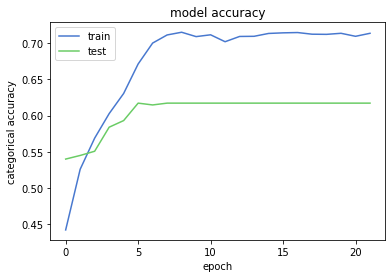

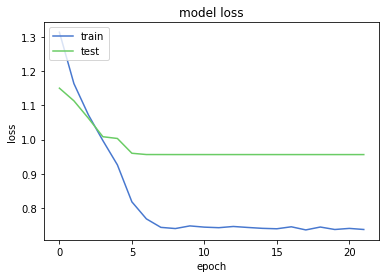

In [ ]:
plot_history(model_history_bert_split)

In [ ]:
pred_y_bert_split = model_bert_split.predict(X_test_bert_split_text)

Test Set Accuracy =  0.614
Test Set F-score =  0.451
Test Set Precision =  0.465
Test Set Recall =  0.444
Confusion matrix, without normalization
[[ 98  10  90   0   6  16]
 [  7 216  55   0   3  46]
 [ 40  31 428   0   1  86]
 [  1   2   5   0   0   0]
 [  2   5   4   0   7   4]
 [  9  39 113   0   6 175]]


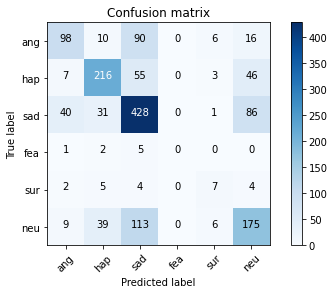

In [ ]:
display_results(y_test_split, pred_y_bert_split)

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

#Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_split = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'roberta-base'

In [ ]:
MAX_LENGTH = 119

tokenizer_roberta_split = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_roberta_split_text = tokenize(X_train_split['transcription'], tokenizer_roberta_split)
X_test_roberta_split_text = tokenize(X_test_split['transcription'], tokenizer_roberta_split)
X_val_roberta_split_text = tokenize(X_val_split['transcription'], tokenizer_roberta_split)

100%|██████████| 1204/1204 [00:00<00:00, 3996.87it/s]


In [ ]:
config_roberta_split = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_split = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_split)

input_ids_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_split = RoBERTa_split(input_ids = input_ids_in_roberta_split, attention_mask = input_masks_in_roberta_split)[0]
X_roberta_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_split)
X_roberta_split = tf.keras.layers.GlobalMaxPool1D()(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(64, activation='relu')(X_roberta_split)
X_roberta_split = tf.keras.layers.Dropout(0.2)(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(6, activation='softmax')(X_roberta_split)

model_roberta_split = tf.keras.Model(inputs=[input_ids_in_roberta_split, input_masks_in_roberta_split], outputs = X_roberta_split)

for layer in model_roberta_split.layers[:3]:
    layer.trainable = False

model_roberta_split.summary()

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model[0][25]    

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_roberta_split_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_split.shape

(1204,)

In [ ]:
model_roberta_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_split = model_roberta_split.fit(X_train_roberta_split_text, 
                    y_train_split, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_roberta_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
151/151 [==============================] - 52s 252ms/step - loss: 1.3562 - sparse_categorical_accuracy: 0.3999 - val_loss: 1.2486 - val_sparse_categorical_accuracy: 0.4543
Epoch 2/30
151/151 [==============================] - 35s 232ms/step - loss: 1.1999 - sparse_categorical_accuracy: 0.5083 - val_loss: 1.1707 - val_sparse_categorical_accuracy: 0.5307
Epoch 3/30
151/151 [==============================] - 35s 233ms/step - loss: 1.1133 - sparse_categorical_accuracy: 0.5492 - val_loss: 1.1074 - val_sparse_categorical_accuracy: 0.5515
Epoch 4/30
151/151 [==============================] - 35s 233ms/step - loss: 1.0504 - sparse_categorical_accuracy: 0.5719 - val_loss: 1.0923 - val_sparse_categorical_accuracy: 0.5756
Epoch 5/30
151/151 [==============================] - 35s 233ms/step - loss: 0.9815 - sparse_categorical_accuracy: 0.6064 - val_loss: 1.0337 - val_sparse_categorical_accuracy: 0.5814
Epoch 6/30
151/151 [==============================] - 35s 234ms/step - loss: 0.9073 -

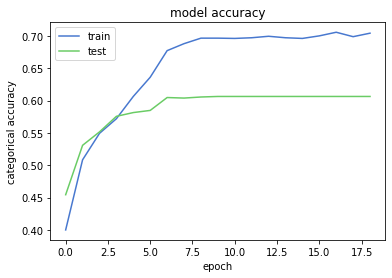

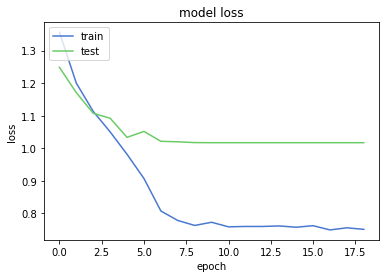

In [ ]:
plot_history(model_history_roberta_split)

In [ ]:
pred_y_roberta_split = model_roberta_split.predict(X_test_roberta_split_text)

Test Set Accuracy =  0.599
Test Set F-score =  0.433
Test Set Precision =  0.442
Test Set Recall =  0.428
Confusion matrix, without normalization
[[ 93  14  94   0   4  15]
 [ 12 219  47   0   3  46]
 [ 50  41 413   0   2  80]
 [  0   4   4   0   0   0]
 [  4   3   6   0   6   3]
 [  9  46 110   0   7 170]]


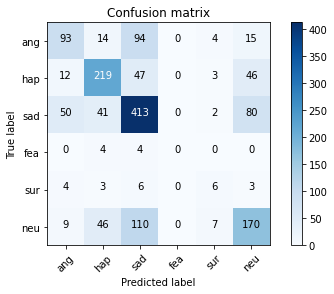

In [ ]:
display_results(y_test_split, pred_y_roberta_split)

In [ ]:
#Session based

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
X_train_session_based_cnn = X_train_session_based.drop(columns=['transcription'])
X_val_session_based_cnn = X_val_session_based.drop(columns=['transcription'])
X_test_session_based_cnn = X_test_session_based.drop(columns=['transcription'])

In [ ]:
X_val_session_based_cnn.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
5764,-0.443977,-0.374089,-0.427991,-0.395804,-0.450072,-0.382339,-0.368465,-0.394210,0.982718,0.205792,-0.066811,-0.090911,-0.193037,-0.184974,-0.168200,-0.175409,-0.870153,-0.928516,1.806700,-0.217657,-0.184739,0.841264,-0.618481,1.111670,0.202382,-0.624058,2.213126,0.116084,-1.166894,1.389603,0.572954,1.617036,2.693890,0.207912,1.614851,2.372580,-0.447713,-0.060380,0.702186,-0.500231,...,-0.134584,-0.126314,-0.119409,-0.099397,-0.082448,-0.072643,-0.070919,-0.071098,-0.069570,-0.032218,-0.033313,-0.034093,-0.034682,-0.035152,-0.035541,-0.035870,-0.036154,-0.036403,-0.036622,-0.036817,-0.036991,-0.037148,-0.037289,-0.037417,-0.037532,-0.037637,-0.037732,-0.037819,-0.037897,-0.037968,-0.038031,-0.038088,-0.038139,-0.038184,-0.038222,-0.038255,-0.038283,-0.038305,-0.038321,-0.038330
5765,-0.126415,-0.158882,-0.115290,-0.197922,-0.133258,-0.163256,-0.066490,-0.236066,0.982718,0.140914,-0.014504,-0.038587,-0.163064,-0.142777,-0.156777,-0.159374,0.299395,-0.561965,0.924385,-1.071686,-1.478071,0.936147,-0.196363,-0.064753,1.422617,0.011297,0.087694,1.270195,0.471312,-0.309720,-0.428363,0.818896,0.871845,-0.550294,-0.026306,0.784973,0.205332,-0.376058,0.085707,0.414662,...,-0.130906,-0.119153,-0.106028,-0.091549,-0.081018,-0.072406,-0.070872,-0.071092,-0.069452,-0.031963,-0.033039,-0.033806,-0.034386,-0.034849,-0.035232,-0.035557,-0.035837,-0.036082,-0.036299,-0.036491,-0.036664,-0.036819,-0.036959,-0.037085,-0.037200,-0.037304,-0.037398,-0.037484,-0.037561,-0.037631,-0.037694,-0.037750,-0.037801,-0.037846,-0.037884,-0.037916,-0.037944,-0.037966,-0.037981,-0.037991
5766,-0.278988,0.731612,-0.355330,0.628158,-0.293263,0.765681,-0.452689,0.349764,-0.947051,-0.507861,-0.045951,-0.014682,-0.191064,-0.184129,-0.004451,-0.014452,-0.308956,0.363503,0.079173,0.672276,2.237842,0.429081,-0.126786,0.669021,-1.178793,-0.543082,0.598846,-1.082359,-0.142325,0.433991,-1.799467,-0.994004,0.036229,-1.166817,0.763662,1.304315,1.642716,0.091284,-0.485854,-2.747113,...,-0.127942,-0.119682,-0.115720,-0.096258,-0.079383,-0.072350,-0.070899,-0.071093,-0.069433,-0.031922,-0.032994,-0.033757,-0.034334,-0.034793,-0.035174,-0.035497,-0.035775,-0.036019,-0.036233,-0.036425,-0.036596,-0.036749,-0.036888,-0.037013,-0.037127,-0.037230,-0.037323,-0.037408,-0.037485,-0.037554,-0.037617,-0.037673,-0.037723,-0.037767,-0.037805,-0.037837,-0.037865,-0.037886,-0.037901,-0.037911
5767,0.006864,-0.153203,0.104417,-0.227928,-0.004136,-0.169692,0.246457,-0.341097,0.698928,-0.897126,-0.043983,-0.031630,-0.118429,-0.035650,-0.160599,-0.154162,0.315761,-2.227274,1.319189,-0.693215,-0.115021,1.812857,-0.811446,-0.181309,-0.304340,-1.106610,1.976316,0.052968,-2.680986,0.313105,-0.213011,-2.108318,-0.457121,-1.769777,-1.121588,1.132246,-0.052144,0.473437,1.086895,0.642241,...,-0.130914,-0.123238,-0.117960,-0.097413,-0.081345,-0.072310,-0.070900,-0.071098,-0.069574,-0.032223,-0.033316,-0.034094,-0.034681,-0.035148,-0.035536,-0.035863,-0.036146,-0.036392,-0.036610,-0.036804,-0.036977,-0.037132,-0.037273,-0.037399,-0.037514,-0.037618,-0.037712,-0.037798,-0.037875,-0.037946,-0.038009,-0.038065,-0.038116,-0.038160,-0.038198,-0.038231,-0.038258,-0.038280,-0.038296,-0.038305
5768,0.644946,0.304369,0.457287,0.208490,0.641891,0.3

In [ ]:
X_train_session_based_cnn = X_train_session_based_cnn.values.reshape(X_train_session_based_cnn.shape[0],X_train_session_based_cnn.shape[1],1)
X_val_session_based_cnn = X_val_session_based_cnn.values.reshape(X_val_session_based_cnn.shape[0],X_val_session_based_cnn.shape[1],1)
X_test_session_based_cnn = X_test_session_based_cnn.values.reshape(X_test_session_based_cnn.shape[0],X_test_session_based_cnn.shape[1],1)

In [ ]:
### Try CNN Models

In [ ]:
model_1d_session_based = Sequential()
model_1d_session_based.add(Conv1D(254,5,padding='same',input_shape=(X_train_session_based_cnn[0].shape))) # there are 8 features
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Dropout(0.1))
model_1d_session_based.add(MaxPooling1D(pool_size=(8)))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Flatten())
model_1d_session_based.add(Dense(6))
model_1d_session_based.add(Activation('softmax'))
opt_sb = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model_1d_session_based.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 524, 254)          1524      
_________________________________________________________________
activation_7 (Activation)    (None, 524, 254)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 524, 128)          162688    
_________________________________________________________________
dropout_98 (Dropout)         (None, 524, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 65, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 65, 128)           82048     
_________________________________________________________________
activation_8 (Activation)    (None, 65, 128)          

In [ ]:
# def plot_history(history_model):
#     # summarize history for accuracy
#     plt.plot(history_model.history['sparse_categorical_accuracy'])
#     plt.plot(history_model.history['val_sparse_categorical_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('categorical accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(history_model.history['loss'])
#     plt.plot(history_model.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
from datetime import datetime

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_1d_session_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

#print(filepath)
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.00000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])

In [ ]:
model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=32,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
136/136 [==============================] - 3s 13ms/step - loss: 1.3516 - sparse_categorical_accuracy: 0.4328 - val_loss: 1.4351 - val_sparse_categorical_accuracy: 0.3992
Epoch 2/30
136/136 [==============================] - 1s 10ms/step - loss: 1.2431 - sparse_categorical_accuracy: 0.4808 - val_loss: 1.3135 - val_sparse_categorical_accuracy: 0.4616
Epoch 3/30
136/136 [==============================] - 1s 10ms/step - loss: 1.1881 - sparse_categorical_accuracy: 0.5151 - val_loss: 1.3274 - val_sparse_categorical_accuracy: 0.4558

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
136/136 [==============================] - 1s 10ms/step - loss: 1.0941 - sparse_categorical_accuracy: 0.5566 - val_loss: 1.3260 - val_sparse_categorical_accuracy: 0.4564

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
136/136 [==============================] - 1s 10ms/step - loss: 1.0647 - sparse_categorical_accuracy:

In [ ]:
model_1d_session_based_hist.history

{'loss': [1.3516178131103516,
  1.2430744171142578,
  1.1881307363510132,
  1.0941013097763062,
  1.0647108554840088],
 'lr': [0.001, 0.001, 0.001, 0.000100000005, 1.0000001e-05],
 'sparse_categorical_accuracy': [0.43281862139701843,
  0.48075592517852783,
  0.5150956511497498,
  0.5565798282623291,
  0.5644157528877258],
 'val_loss': [1.4351418018341064,
  1.3134733438491821,
  1.3273626565933228,
  1.3260136842727661,
  1.3317970037460327],
 'val_sparse_categorical_accuracy': [0.3992197513580322,
  0.461638480424881,
  0.45578673481941223,
  0.4564369320869446,
  0.459037721157074]}

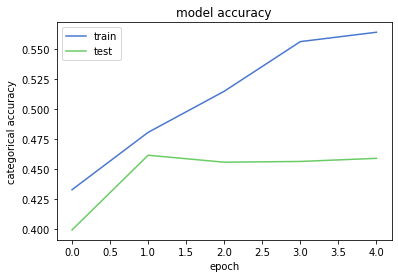

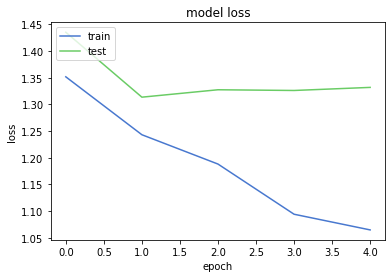

In [ ]:
plot_history(model_1d_session_based_hist)

In [ ]:
pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [ ]:
pred_y_session_based.shape

(1646, 6)

In [ ]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [ ]:
#pred_y_split.shape

In [ ]:
#pred_y_split.shape

Test Set Accuracy =  0.458
Test Set F-score =  0.277
Test Set Precision =  0.339
Test Set Recall =  0.269
Confusion matrix, without normalization
[[ 51  23  72   0   0  22]
 [  5 122 232   0   0  83]
 [ 15  43 479   0   0  87]
 [  0   1   8   0   0   1]
 [  1   3  13   0   0   1]
 [  1  37 244   0   0 102]]


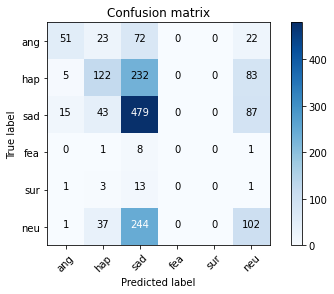

In [ ]:
display_results(y_test_session_based, pred_y_session_based)

In [ ]:
# model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])
# model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=128,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

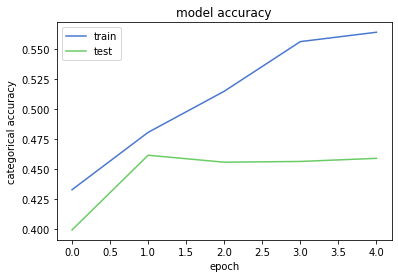

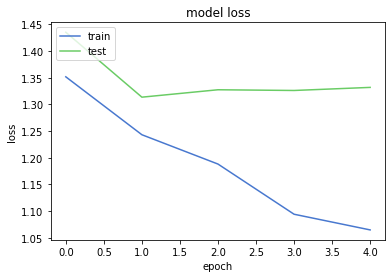

In [ ]:
plot_history(model_1d_session_based_hist)

In [ ]:
pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

Test Set Accuracy =  0.458
Test Set F-score =  0.277
Test Set Precision =  0.339
Test Set Recall =  0.269
Confusion matrix, without normalization
[[ 51  23  72   0   0  22]
 [  5 122 232   0   0  83]
 [ 15  43 479   0   0  87]
 [  0   1   8   0   0   1]
 [  1   3  13   0   0   1]
 [  1  37 244   0   0 102]]


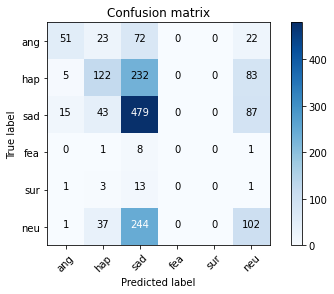

In [ ]:
display_results(y_test_session_based, pred_y_session_based)

In [ ]:
# model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])
# model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=1024,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

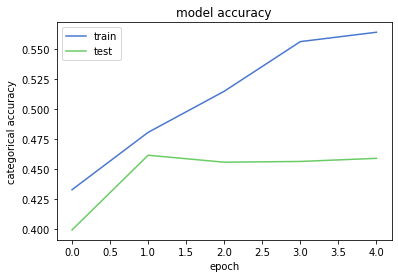

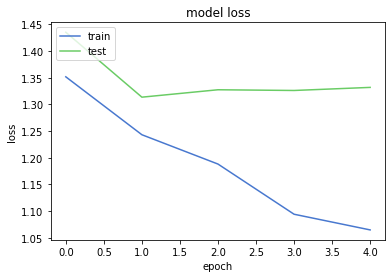

In [ ]:
plot_history(model_1d_session_based_hist)

In [ ]:
pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

Test Set Accuracy =  0.458
Test Set F-score =  0.277
Test Set Precision =  0.339
Test Set Recall =  0.269
Confusion matrix, without normalization
[[ 51  23  72   0   0  22]
 [  5 122 232   0   0  83]
 [ 15  43 479   0   0  87]
 [  0   1   8   0   0   1]
 [  1   3  13   0   0   1]
 [  1  37 244   0   0 102]]


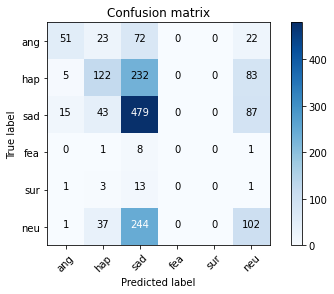

In [ ]:
display_results(y_test_session_based, pred_y_session_based)

In [ ]:
#from sklearn.metrics import balanced_accuracy_score

In [ ]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
from datetime import datetime

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' +'model_init_2d_session_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
X_train_session_based_cnn_2d = np.expand_dims(X_train_session_based_cnn, -1)
X_val_session_based_cnn_2d = np.expand_dims(X_val_session_based_cnn, -1)
X_test_session_based_cnn_2d = np.expand_dims(X_test_session_based_cnn, -1)

In [ ]:
X_train_session_based_cnn.shape

(4339, 524, 1)

In [ ]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_session_based_2d = Sequential()
model_session_based_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_session_based_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Flatten())
model_session_based_2d.add(Dense(6))
model_session_based_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [ ]:
model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
              y_train_session_based,
              epochs=30,
              batch_size=32,
              validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
136/136 [==============================] - 5s 36ms/step - loss: 1.3202 - sparse_categorical_accuracy: 0.4522 - val_loss: 1.3410 - val_sparse_categorical_accuracy: 0.4142
Epoch 2/30
136/136 [==============================] - 5s 34ms/step - loss: 1.1792 - sparse_categorical_accuracy: 0.5236 - val_loss: 1.3119 - val_sparse_categorical_accuracy: 0.4473
Epoch 3/30
136/136 [==============================] - 5s 34ms/step - loss: 1.1031 - sparse_categorical_accuracy: 0.5437 - val_loss: 1.3971 - val_sparse_categorical_accuracy: 0.4187

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
136/136 [==============================] - 5s 34ms/step - loss: 0.9713 - sparse_categorical_accuracy: 0.6050 - val_loss: 1.4636 - val_sparse_categorical_accuracy: 0.4174

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
136/136 [==============================] - 5s 34ms/step - loss: 0.9388 - sparse_categorical_accuracy:

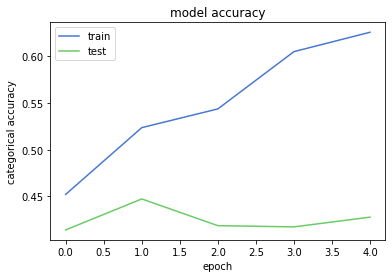

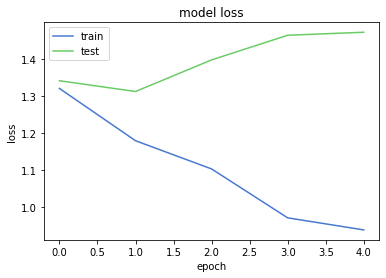

In [ ]:
plot_history(model_history_session_based_2d)

In [ ]:
pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

Test Set Accuracy =  0.411
Test Set F-score =  0.264
Test Set Precision =  0.305
Test Set Recall =  0.268
Confusion matrix, without normalization
[[ 58  19  58   0   1  32]
 [ 22  82 139   0   0 199]
 [ 20  42 321   0   1 240]
 [  0   1   5   0   0   4]
 [  1   3   6   0   0   8]
 [  7  14 148   0   0 215]]


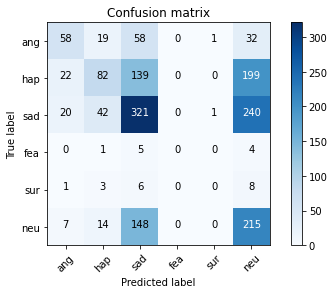

In [ ]:
display_results(y_test_session_based, pred_y_2d_session_based)

In [ ]:
# model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['sparse_categorical_accuracy'])
# model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
#               y_train_session_based,
#               epochs=30,
#               batch_size=128,
#               validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
#               callbacks=[model_checkpoint, early_stopping, reduce_lr])

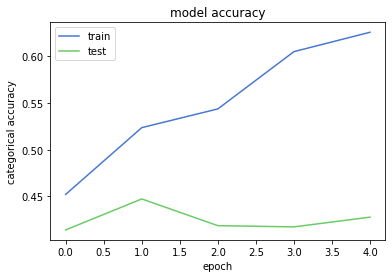

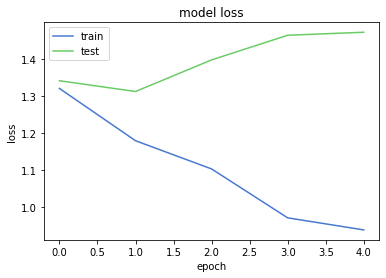

In [ ]:
plot_history(model_history_session_based_2d)

In [ ]:
pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

Test Set Accuracy =  0.411
Test Set F-score =  0.264
Test Set Precision =  0.305
Test Set Recall =  0.268
Confusion matrix, without normalization
[[ 58  19  58   0   1  32]
 [ 22  82 139   0   0 199]
 [ 20  42 321   0   1 240]
 [  0   1   5   0   0   4]
 [  1   3   6   0   0   8]
 [  7  14 148   0   0 215]]


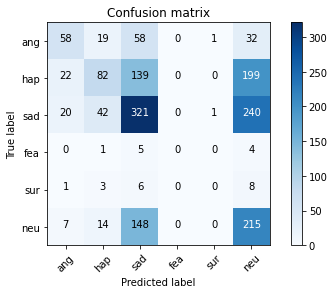

In [ ]:
display_results(y_test_session_based, pred_y_2d_session_based)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_dbert_sb = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
       
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_dbert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_dbert_sb)
X_test_dbert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_dbert_sb)
X_val_dbert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_dbert_sb)

100%|██████████| 1538/1538 [00:00<00:00, 2327.84it/s]


In [ ]:
config_dbert_sb = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_sb = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb)

input_ids_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_dbert_sb = DistilBERT_sb(input_ids = input_ids_in_dbert_sb, attention_mask = input_masks_in_dbert_sb)[0]
X_dbert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb)
X_dbert_sb = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dropout(0.2)(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(6, activation='softmax')(X_dbert_sb)

model_dbert_session_based = tf.keras.Model(inputs=[input_ids_in_dbert_sb, input_masks_in_dbert_sb], outputs = X_dbert_sb)

for layer in model_dbert_session_based.layers[:3]:
    layer.trainable = False

model_dbert_session_based.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_1 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_1[0][1

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_dbert_sb_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_session_based.shape

(1538,)

In [ ]:
model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
                    y_train_session_based, 
                    epochs = 25,
                    batch_size=32, 
                    validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
136/136 [==============================] - 28s 147ms/step - loss: 1.3227 - sparse_categorical_accuracy: 0.4360 - val_loss: 1.2632 - val_sparse_categorical_accuracy: 0.4538
Epoch 2/25
136/136 [==============================] - 18s 134ms/step - loss: 1.1697 - sparse_categorical_accuracy: 0.5176 - val_loss: 1.2032 - val_sparse_categorical_accuracy: 0.4909
Epoch 3/25
136/136 [==============================] - 18s 133ms/step - loss: 1.1011 - sparse_categorical_accuracy: 0.5577 - val_loss: 1.2610 - val_sparse_categorical_accuracy: 0.4597

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/25
136/136 [==============================] - 18s 133ms/step - loss: 0.9861 - sparse_categorical_accuracy: 0.6077 - val_loss: 1.1301 - val_sparse_categorical_accuracy: 0.5325
Epoch 5/25
136/136 [==============================] - 18s 133ms/step - loss: 0.9473 - sparse_categorical_accuracy: 0.6264 - val_loss: 1.1194 - val_sparse_categorical_accuracy: 0.5358
Epo

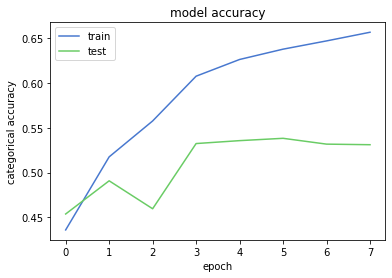

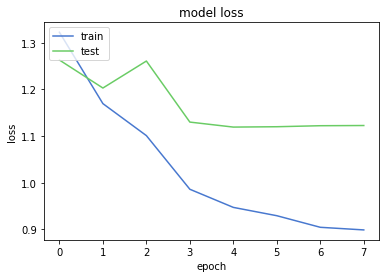

In [ ]:
plot_history(model_history_dbert_session_based)

In [ ]:
pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.597
Test Set F-score =  0.382
Test Set Precision =  0.391
Test Set Recall =  0.379
Confusion matrix, without normalization
[[ 76  14  57   0   0  21]
 [ 11 246 104   0   0  81]
 [ 45  45 454   0   0  80]
 [  0   3   7   0   0   0]
 [  3   3   7   0   0   5]
 [ 16  34 125   0   2 207]]


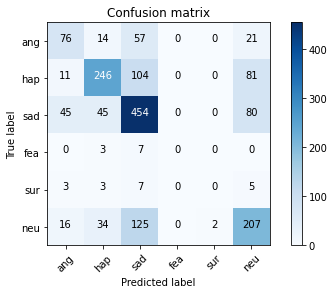

In [ ]:
display_results(y_test_session_based,pred_y_dbert_session_based)

In [ ]:
# model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 25,
#                     batch_size=256, 
#                     validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

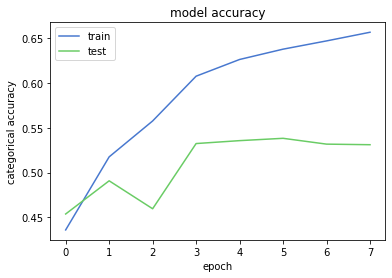

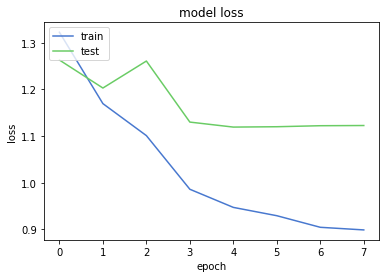

In [ ]:
plot_history(model_history_dbert_session_based)

In [ ]:
pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.597
Test Set F-score =  0.382
Test Set Precision =  0.391
Test Set Recall =  0.379
Confusion matrix, without normalization
[[ 76  14  57   0   0  21]
 [ 11 246 104   0   0  81]
 [ 45  45 454   0   0  80]
 [  0   3   7   0   0   0]
 [  3   3   7   0   0   5]
 [ 16  34 125   0   2 207]]


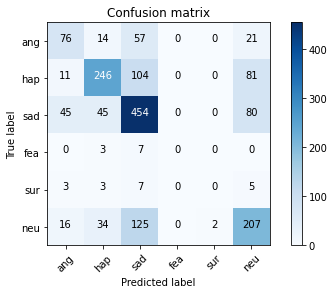

In [ ]:
display_results(y_test_session_based,pred_y_dbert_session_based)

In [ ]:
# model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 25,
#                     batch_size=256, 
#                     validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

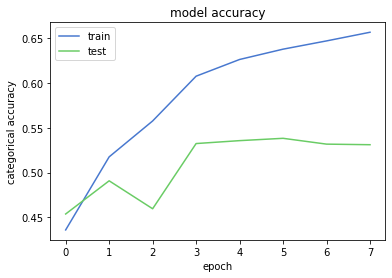

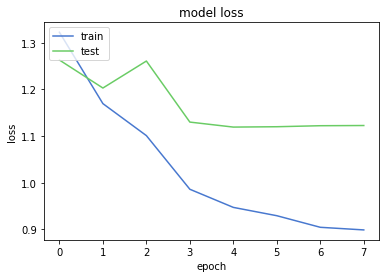

In [ ]:
plot_history(model_history_dbert_session_based)

In [ ]:
pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.597
Test Set F-score =  0.382
Test Set Precision =  0.391
Test Set Recall =  0.379
Confusion matrix, without normalization
[[ 76  14  57   0   0  21]
 [ 11 246 104   0   0  81]
 [ 45  45 454   0   0  80]
 [  0   3   7   0   0   0]
 [  3   3   7   0   0   5]
 [ 16  34 125   0   2 207]]


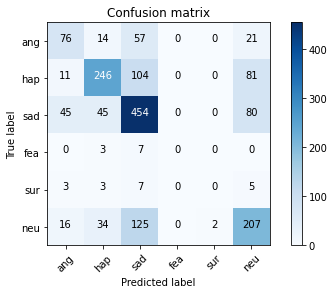

In [ ]:
display_results(y_test_session_based,pred_y_dbert_session_based)

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import BertTokenizer, TFBertModel, BertConfig

In [ ]:
MODEL_NAME = 'bert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_bert_sb = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_bert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_bert_sb)
X_test_bert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_bert_sb)
X_val_bert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_bert_sb)

100%|██████████| 1538/1538 [00:00<00:00, 2303.78it/s]


In [ ]:
config_bert_sb = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_sb = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb)

input_ids_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_sb = BERT_sb(input_ids = input_ids_in_bert_sb, attention_mask = input_masks_in_bert_sb)[0]
X_bert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb)
X_bert_sb = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb)
X_bert_sb = tf.keras.layers.Dropout(0.2)(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(6, activation='softmax')(X_bert_sb)

model_bert_session_based = tf.keras.Model(inputs=[input_ids_in_bert_sb, input_masks_in_bert_sb], outputs = X_bert_sb)

for layer in model_bert_session_based.layers[:3]:
    layer.trainable = False

model_bert_session_based.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 114, 256)     918528      tf_bert_model_1[0][25]     

In [ ]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_bert_sb_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_session_based.shape

(1538,)

In [ ]:
model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_bert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
136/136 [==============================] - 50s 267ms/step - loss: 1.3074 - sparse_categorical_accuracy: 0.4423 - val_loss: 1.2193 - val_sparse_categorical_accuracy: 0.4720
Epoch 2/30
136/136 [==============================] - 33s 245ms/step - loss: 1.1411 - sparse_categorical_accuracy: 0.5331 - val_loss: 1.1213 - val_sparse_categorical_accuracy: 0.5299
Epoch 3/30
136/136 [==============================] - 33s 245ms/step - loss: 1.0489 - sparse_categorical_accuracy: 0.5824 - val_loss: 1.1161 - val_sparse_categorical_accuracy: 0.5215

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
136/136 [==============================] - 33s 245ms/step - loss: 0.9303 - sparse_categorical_accuracy: 0.6430 - val_loss: 1.0736 - val_sparse_categorical_accuracy: 0.5501
Epoch 5/30
136/136 [==============================] - 33s 245ms/step - loss: 0.9027 - sparse_categorical_accuracy: 0.6423 - val_loss: 1.0682 - val_sparse_categorical_accuracy: 0.5468

Ep

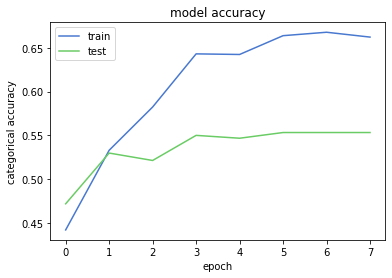

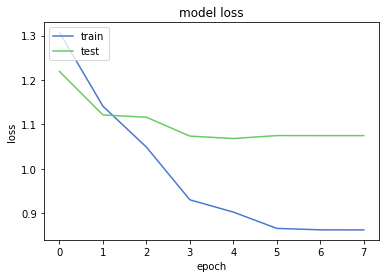

In [ ]:
plot_history(model_history_bert_session_based)

In [ ]:
model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=256, 
                    validation_data=(X_val_bert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
17/17 [==============================] - 41s 2s/step - loss: 0.8961 - sparse_categorical_accuracy: 0.6467 - val_loss: 1.0442 - val_sparse_categorical_accuracy: 0.5624
Epoch 2/30
17/17 [==============================] - 24s 1s/step - loss: 0.8223 - sparse_categorical_accuracy: 0.6843 - val_loss: 1.0896 - val_sparse_categorical_accuracy: 0.5670

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
17/17 [==============================] - 24s 1s/step - loss: 0.7733 - sparse_categorical_accuracy: 0.7027 - val_loss: 1.0494 - val_sparse_categorical_accuracy: 0.5787

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
17/17 [==============================] - 24s 1s/step - loss: 0.7695 - sparse_categorical_accuracy: 0.7075 - val_loss: 1.0526 - val_sparse_categorical_accuracy: 0.5767

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


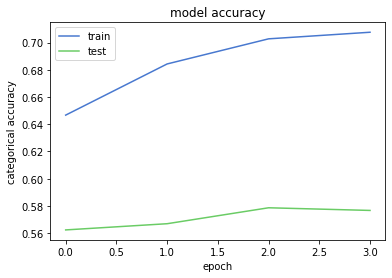

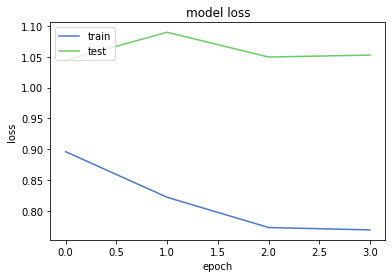

In [ ]:
plot_history(model_history_bert_session_based)

In [ ]:
pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.618
Test Set F-score =  0.481
Test Set Precision =  0.630
Test Set Recall =  0.462
Confusion matrix, without normalization
[[ 91   8  52   0   0  17]
 [ 14 263  89   0   5  71]
 [ 56  31 454   0   1  82]
 [  1   2   6   1   0   0]
 [  5   3   5   0   5   0]
 [ 17  41 119   0   3 204]]


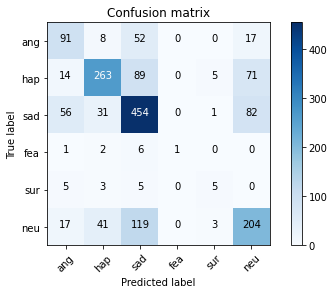

In [ ]:
display_results(y_test_session_based,pred_y_bert_session_based)

In [ ]:
pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.618
Test Set F-score =  0.481
Test Set Precision =  0.630
Test Set Recall =  0.462
Confusion matrix, without normalization
[[ 91   8  52   0   0  17]
 [ 14 263  89   0   5  71]
 [ 56  31 454   0   1  82]
 [  1   2   6   1   0   0]
 [  5   3   5   0   5   0]
 [ 17  41 119   0   3 204]]


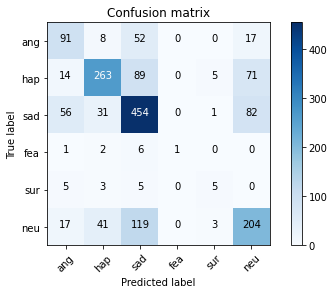

In [ ]:
display_results(y_test_session_based,pred_y_bert_session_based)

In [ ]:
# model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=256, 
#                     validation_data=(X_val_bert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

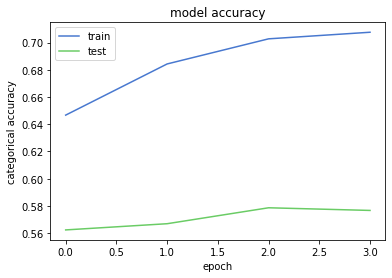

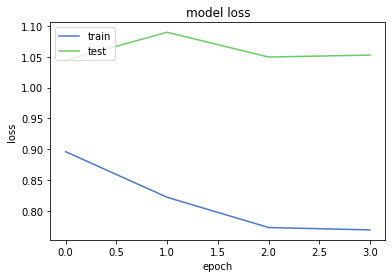

In [ ]:
plot_history(model_history_bert_session_based)

In [ ]:
pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.618
Test Set F-score =  0.481
Test Set Precision =  0.630
Test Set Recall =  0.462
Confusion matrix, without normalization
[[ 91   8  52   0   0  17]
 [ 14 263  89   0   5  71]
 [ 56  31 454   0   1  82]
 [  1   2   6   1   0   0]
 [  5   3   5   0   5   0]
 [ 17  41 119   0   3 204]]


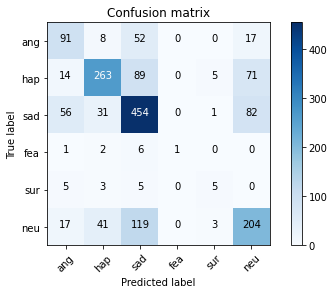

In [ ]:
display_results(y_test_session_based,pred_y_bert_session_based)

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 119


In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig

In [ ]:
MODEL_NAME = 'roberta-base'

In [ ]:
MAX_LENGTH = 119

tokenizer_robert_sb = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
X_train_roberta_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_roberta_sb)
X_test_roberta_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_roberta_sb)
X_val_roberta_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_roberta_sb)

100%|██████████| 1538/1538 [00:00<00:00, 4411.14it/s]


In [ ]:
config_roberta_sb = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_sb = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_sb)

input_ids_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_sb = RoBERTa_sb(input_ids = input_ids_in_roberta_sb, attention_mask = input_masks_in_roberta_sb)[0]
X_roberta_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_sb)
X_roberta_sb = tf.keras.layers.GlobalMaxPool1D()(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(64, activation='relu')(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dropout(0.2)(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(6, activation='softmax')(X_roberta_sb)

model_roberta_session_based = tf.keras.Model(inputs=[input_ids_in_roberta_sb, input_masks_in_roberta_sb], outputs = X_roberta_sb)

for layer in model_roberta_session_based.layers[:3]:
    layer.trainable = False

model_roberta_session_based.summary()

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 119)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 119)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model_1 (TFRobertaMo TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 119, 256)     918528      tf_roberta_model_1[0][25]  

In [ ]:
curr_dt_time = datetime.now()
local_filename = output_dir + '/' + 'model_init_roberta_sb_init_end' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [ ]:
y_val_session_based.shape

(1538,)

In [ ]:
model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
136/136 [==============================] - 50s 278ms/step - loss: 1.4160 - sparse_categorical_accuracy: 0.3701 - val_loss: 1.3063 - val_sparse_categorical_accuracy: 0.4376
Epoch 2/30
136/136 [==============================] - 34s 249ms/step - loss: 1.2611 - sparse_categorical_accuracy: 0.4665 - val_loss: 1.1931 - val_sparse_categorical_accuracy: 0.4681
Epoch 3/30
136/136 [==============================] - 34s 249ms/step - loss: 1.1636 - sparse_categorical_accuracy: 0.5287 - val_loss: 1.1577 - val_sparse_categorical_accuracy: 0.5111
Epoch 4/30
136/136 [==============================] - 34s 250ms/step - loss: 1.0705 - sparse_categorical_accuracy: 0.5727 - val_loss: 1.1099 - val_sparse_categorical_accuracy: 0.5306
Epoch 5/30
136/136 [==============================] - 34s 250ms/step - loss: 1.0124 - sparse_categorical_accuracy: 0.6045 - val_loss: 1.1229 - val_sparse_categorical_accuracy: 0.5260

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epo

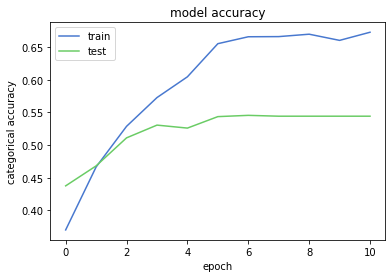

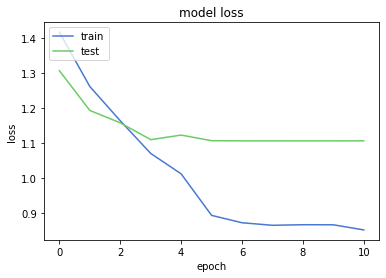

In [ ]:
plot_history(model_history_roberta_session_based)

In [ ]:
# model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=256, 
#                     validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

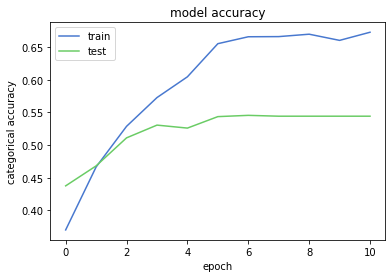

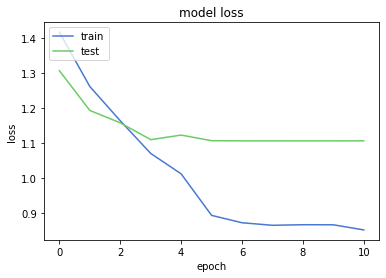

In [ ]:
plot_history(model_history_roberta_session_based)

In [ ]:
pred_y_roberta_session_based = model_roberta_session_based.predict(X_test_roberta_session_based_text)

Test Set Accuracy =  0.585
Test Set F-score =  0.404
Test Set Precision =  0.427
Test Set Recall =  0.396
Confusion matrix, without normalization
[[ 86  14  54   0   0  14]
 [ 17 258  92   0   3  72]
 [ 58  52 434   0   0  80]
 [  0   2   7   0   0   1]
 [  3   4   5   0   2   4]
 [ 15  45 139   0   2 183]]


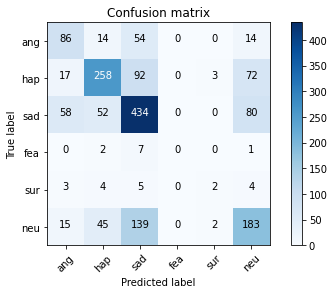

In [ ]:
display_results(y_test_session_based,pred_y_roberta_session_based)

In [ ]:
### Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
import joblib

In [ ]:
model_1d_name = output_dir+'/model_init_1d_session_init_end/'+'model-00004-0.54413-1.12441-0.44473-1.426522021-10-2315_14_46.093026.h5'
model_2d_name = output_dir +'/model_init_2d_session_init_end/' + 'model-00002-0.53745-1.12375-0.43433-1.357342021-10-2316_26_39.984024.h5'
model_rf_name = output_dir + '/model_rf_session_init_end/' + 'model_rf_0.392_2021-10-2318_10_36.162898' + '.joblib'

In [ ]:
model_1d_ens = keras.models.load_model(model_1d_name)
model_2d_ens = keras.models.load_model(model_2d_name)
model_rf_ens = joblib.load(model_rf_name)

In [ ]:
y_ens_1d_pred = model_1d_ens.predict(X_test_session_based_cnn)

In [ ]:
y_ens_2d_pred = model_2d_ens.predict(X_test_session_based_cnn_2d)

In [ ]:
y_ens_rf_pred = model_rf_ens.predict_proba(X_test_session_based_rf.drop(columns='transcription'))

In [ ]:
y_ens_rf_pred.shape

(1646, 6)

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_sb_ens = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_session_based_ens = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_sb_ens.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_dbert_sb_ens = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
       
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
config_dbert_sb_ens = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_sb_ens = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb_ens)

input_ids_in_dbert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_dbert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_dbert_sb_ens = DistilBERT_sb_ens(input_ids = input_ids_in_dbert_sb_ens, attention_mask = input_masks_in_dbert_sb_ens)[0]
X_dbert_sb_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.Dropout(0.2)(X_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.Dense(6, activation='softmax')(X_dbert_sb_ens)

model_dbert_session_based_ens = tf.keras.Model(inputs=[input_ids_in_dbert_sb_ens, input_masks_in_dbert_sb_ens], outputs = X_dbert_sb_ens)

#for layer in model_dbert_session_based.layers[:3]:
#    layer.trainable = False

model_dbert_session_based_ens.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_2 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_2[0][1

In [ ]:
model_dbert_session_based_ens.load_weights(output_dir+'/model_init_dbert_sb_init_end/'+'model-00002-0.65315-0.88066-0.55137-1.115182021-10-2316_16_02.040413.h5')

In [ ]:
y_ens_dbert_session_based_pred = model_dbert_session_based_ens.predict(X_test_dbert_session_based_text)

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_sb_ens = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_session_based_ens = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_sb_ens.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import BertTokenizer, TFBertModel, BertConfig

In [ ]:
MODEL_NAME = 'bert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_bert_sb_ens = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
config_bert_sb_ens = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_sb_ens = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb_ens)

input_ids_in_bert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_sb_ens = BERT_sb(input_ids = input_ids_in_bert_sb_ens, attention_mask = input_masks_in_bert_sb_ens)[0]
X_bert_sb_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.Dropout(0.2)(X_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.Dense(6, activation='softmax')(X_bert_sb_ens)

model_bert_session_based_ens = tf.keras.Model(inputs=[input_ids_in_bert_sb_ens, input_masks_in_bert_sb_ens], outputs = X_bert_sb_ens)

#for layer in model_bert_session_based.layers[:3]:
#    layer.trainable = False

model_bert_session_based_ens.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 114, 256)     918528      tf_bert_model[1][25]       

In [ ]:
model_bert_session_based_ens.load_weights(output_dir+'/model_init_bert_sb_init_end/model-00007-0.57041-1.07485-0.48700-1.181942021-10-2315_36_45.578013'+'.h5')

ValueError: ignored

In [ ]:
y_ens_1d_pred.shape

(1646, 6)

In [ ]:
y_ens_all_pred = array([y_ens_rf_pred, y_ens_1d_pred,y_ens_2d_pred,y_ens_dbert_session_based_pred])

In [ ]:
y_ens_summed_pred = tensordot(y_ens_all_pred, [1,1,3,6], axes=((0),(0)))

In [ ]:
y_ens_summed_pred.shape

(1646, 6)

In [ ]:
display_results(y_test_session_based,y_ens_summed_pred)

Test Set Accuracy =  0.610
Test Set F-score =  0.394
Test Set Precision =  0.416
Test Set Recall =  0.386
Confusion matrix, without normalization
[[ 85  11  61   0   0  11]
 [ 13 259 119   0   0  51]
 [ 35  46 492   0   0  51]
 [  0   3   6   0   0   1]
 [  2   4  11   0   0   1]
 [  6  31 179   0   0 168]]


In [ ]:
model_combined_split_db_1 = VotingClassifier(estimators=[('m1ds', model_1d_ens), ('m2ds', model_2d_ens)], voting='soft')

In [ ]:
model_combined_split_db_1.predict_proba(X_train_split)